# AI-Generated Notebook for Dandiset 001335

This notebook was AI-generated using dandi-notebook-gen and has not been fully verified.
Use caution when interpreting the code or results.

This notebook provides an introduction to Dandiset 001335 and demonstrates how to load and explore the data it contains.
The Dandiset contains neuropixels recordings from the hippocampus of head-fixed mice during odor presentation.

Before running this notebook, make sure you have the necessary packages installed.
You can install them using pip:
```bash
pip install dandi dandi-notebook-gen lindi pynwb matplotlib seaborn
```

In [1]:
# Import necessary libraries
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()
from dandi.dandiapi import DandiAPIClient

## Introduction to Dandiset 001335

This Dandiset contains Neuropixels Recordings from Hippocampus of head-fixed mice during odor presentation.

**Description:** Head-fixed wild type mice were presented with various odor sequences, as neural activity was recorded from hippocampus using Neuropixels probes.

**License:** CC-BY-4.0

**Contributors:** Mohapatra, Manish; Halchenko, Yaroslav

**Keywords:** ecephys, neuropixels, odor-sequences, hippocampus

In [2]:
# List all assets in the Dandiset
client = DandiAPIClient()
dandiset = client.get_dandiset("001335")
assets = list(dandiset.get_assets())
print(f"Number of assets in the Dandiset: {len(assets)}")
for asset in assets:
    print(f"- {asset.path}")

Number of assets in the Dandiset: 1
- sub-M541/sub-M541_ecephys.nwb


We will load and explore the NWB file: `sub-M541/sub-M541_ecephys.nwb`.

In [3]:
# Load the NWB file
f = lindi.LindiH5pyFile.from_lindi_file("https://lindi.neurosift.org/dandi/dandisets/001335/assets/aca66db7-4c02-4453-8dcb-a179d44b1c5d/nwb.lindi.json")
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

# Print basic information about the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experiment description: {nwb.experiment_description}")

Session description: Block 1:UE (ABC), Block 2:SE (DEF), Block3:Localizer
Identifier: M541-2024-08-31
Session start time: 2025-02-14 10:53:25.647928-05:00
Experiment description: Head-fixed mouse presented with odor sequences


## Exploring Epochs

This NWB file contains information about different experimental blocks and odor presentations. We can explore these epochs using the `nwb.intervals` attribute.

In [4]:
# List available intervals
print("Available intervals:")
for interval_name in nwb.intervals:
    print(f"- {interval_name}")

Available intervals:
- Block 1
- Block 2
- Block 3
- Odor A ON
- Odor B ON
- Odor C ON
- Odor D ON
- Odor E ON
- Odor F ON


Let's examine the `Odor A ON` interval, which indicates the times when Odor A was presented.

In [5]:
# Examine the Odor A ON interval
odor_a_on = nwb.intervals["Odor A ON"]
print(f"Number of Odor A presentations: {len(odor_a_on['start_time'])}")
print(f"Start times of Odor A presentations: {odor_a_on['start_time'][:5]}") # Print the first 5 start times
print(f"Stop times of Odor A presentations: {odor_a_on['stop_time'][:5]}") # Print the first 5 stop times

Number of Odor A presentations: 101
Start times of Odor A presentations: [645.080373 664.28168  676.90486  683.812947 713.7195  ]
Stop times of Odor A presentations: [647.08042  666.281687 678.9049   685.929067 715.719507]


## Exploring LFP Data

The NWB file contains LFP data recorded using Neuropixels probes. Let's load and visualize a small snippet of this data.

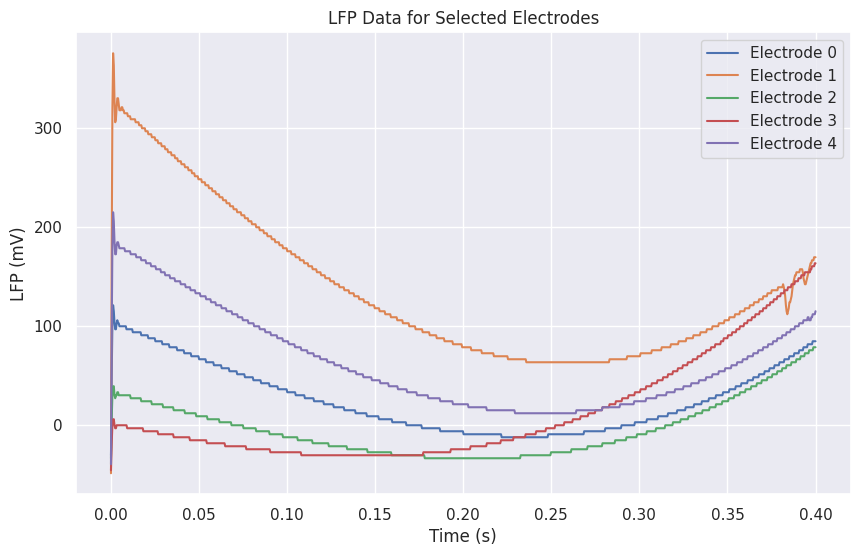

In [6]:
# Get LFP data
lfp = nwb.processing["ecephys"]["LFP"]
lfp_data = lfp.data
electrodes = lfp.electrodes

# Select a subset of electrodes and time points
num_electrodes = 5
num_timepoints = 1000
electrode_ids = electrodes["id"].data[:num_electrodes]
start_time = 0
end_time = num_timepoints / lfp.rate

# Get the data
data = lfp_data[:num_timepoints, :num_electrodes]

# Create a time vector
time = np.linspace(start_time, end_time, num_timepoints)

# Plot the LFP data for each electrode
plt.figure(figsize=(10, 6))
for i in range(num_electrodes):
    plt.plot(time, data[:, i], label=f"Electrode {electrode_ids[i]}")

plt.xlabel("Time (s)")
plt.ylabel("LFP (mV)")
plt.title("LFP Data for Selected Electrodes")
plt.legend()
plt.show()

The plot above shows the LFP data for five electrodes over a short period of time. There's an initial spike at the beginning, followed by a decrease, a plateau, and then a rise towards the end. Electrode 1 shows higher initial activity and Electrode 2 and 3 exhibit the least activity.

## Exploring Spike Times
We can also examine the spiking activity of individual units. Let's plot histograms of the spike times for a few selected units.

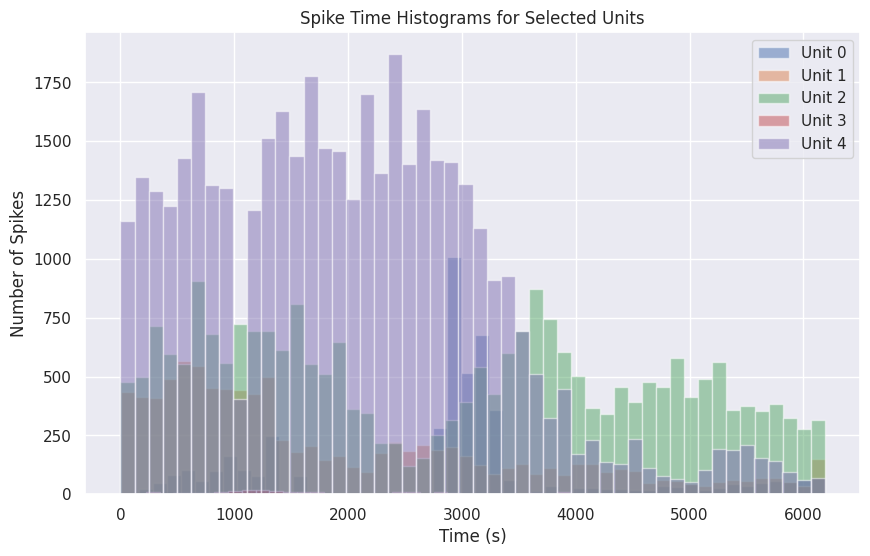

In [7]:
# Get units data
units = nwb.units
spike_times = units["spike_times"]

# Select a subset of units
num_units = 5
unit_ids = units["id"].data[:num_units]

# Plot histograms of spike times for each unit
plt.figure(figsize=(10, 6))
for i in range(num_units):
    times = spike_times[i]
    plt.hist(times, bins=50, alpha=0.5, label=f"Unit {unit_ids[i]}")

plt.xlabel("Time (s)")
plt.ylabel("Number of Spikes")
plt.title("Spike Time Histograms for Selected Units")
plt.legend()
plt.show()

The histograms above show the distribution of spike times for five different units. Unit 4 has the highest spike frequency, followed by Unit 0. Unit 2 spikes more later in the time range, while Units 1 and 3 have less activity compared to the others.

## Conclusion
This notebook provides a basic introduction to Dandiset 001335 and demonstrates how to load and explore the data it contains using `pynwb` and `lindi`.
We have shown how to access and visualize LFP data and spike times. This notebook can serve as a starting point for more in-depth analyses of this dataset.